# Group 39 Project Report

## *Tennis Win Prediction*

**Introduction:** The Association of Tennis Professionals (ATP) is the sport governing body of tennis for men’s professional tennis competitions in the world. Statistics of all matches in the ATP competitions are recorded annually including the match location, match draw size, player’s statistics etc. 

<img src="download.png" width = "200"/>

Our target dataset of interest is the list of ATP tennis matches from the year 2022 in the world. Since many factors - age, height, or seed (a player’s ranking based on past performances) can determine the prospect of a player’s match win or loss, our analysis aims to study a specific player’s statistics to predict the win-loss probability of that player against other players. Our chosen study target is Felix Auger Aliassime, a current tennis player who has played the most matches in 2022. We will be examining the effect of his opponents’ age, height or seed to Felix’s win rate. Therefore, through this project, we will be answering the question: 

*Within the year 2022, ...*

### Preliminary Data Analaysis:

##### Installing Necessary Packages:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Below are two ways to view data from the web, from is directly reading from the csv, the other is downloading it first then viewing. 
For our data wrangling, we will be using the tennis_data, where the data is downloaded and then read (The TA mentioned this was fine for our purposes). 

In [2]:
url <- "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv"

#Reading Data from the Web -> To show that our data can be read directly from the web
web_tennis_data <- read_csv(url)
glimpse(web_tennis_data)

#Downloading the data from the web to view it
destfile <- "data/atp_matches_2022.csv"
download.file(url, destfile)
tennis_data <- read_csv("data/atp_matches_2022.csv")
tennis_data


Rows: 2917 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,917
Columns: 49
$ tourney_id         <chr> "2022-8888", "2022-8888", "2022-8888", "2022-8888",…
$ tourney_name       <chr> "Atp Cup", "Atp Cup", "Atp Cup", "Atp Cup", "Atp Cu…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_date       <dbl> 20220103, 20220103, 20220103, 20220103, 20220103, 2…
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 2…
$ winner_id          <dbl> 200000, 133430, 105138, 105807, 106421, 133430, 134…
$ winner_seed        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ winner_entry       <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ winner_name        <chr> "Felix Auger Aliassime", "Denis Shapovalov", "Rober…
$ winner_hand        <chr> "R", "L", "R", "R", "R", "L", "R", "R", "R", "R", "…
$ winner_ht     

Rows: 2917 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-8888,Atp Cup,Hard,16,A,20220103,300,200000,NA,NA,⋯,50,32,7,10,3,5,11,3308,19,2260
2022-8888,Atp Cup,Hard,16,A,20220103,299,133430,NA,NA,⋯,33,21,8,9,3,6,14,2475,20,2230
2022-8888,Atp Cup,Hard,16,A,20220103,298,105138,NA,NA,⋯,80,62,20,16,6,7,19,2260,9,3706
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,1,138846,NA,NA,⋯,54,29,8,11,6,10,1059,10,1881,1
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,2,209409,NA,NA,⋯,39,24,7,10,5,9,1050,10,NA,NA
2022-M-DC-2022-WG2-PO-HKG-BEN-01,Davis Cup WG2 PO: HKG vs BEN,Hard,4,D,20220304,4,208414,NA,NA,⋯,34,24,13,10,5,8,NA,NA,NA,NA


`summarise()` has grouped output by 'name'. You can override using the
`.groups` argument.


name,mean_age,ht,rate_of_winning
<chr>,<dbl>,<dbl>,<dbl>
Adrian Mannarino,33.87037,183,0.5185185
Aisam Ul Haq Qureshi,41.90000,183,1.0000000
Ajeet Rai,23.60000,188,0.0000000
⋮,⋮,⋮,⋮
Zhizhen Zhang,25.92222,193,0.5555556
Zizou Bergs,22.95714,185,0.1428571
Zsombor Piros,22.50000,180,0.3333333


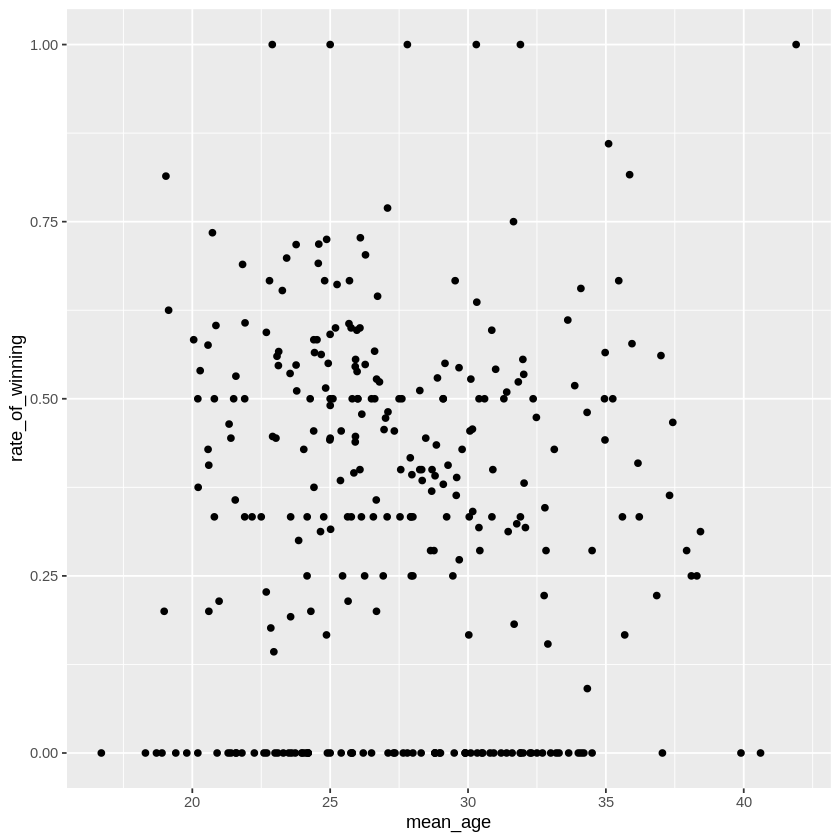

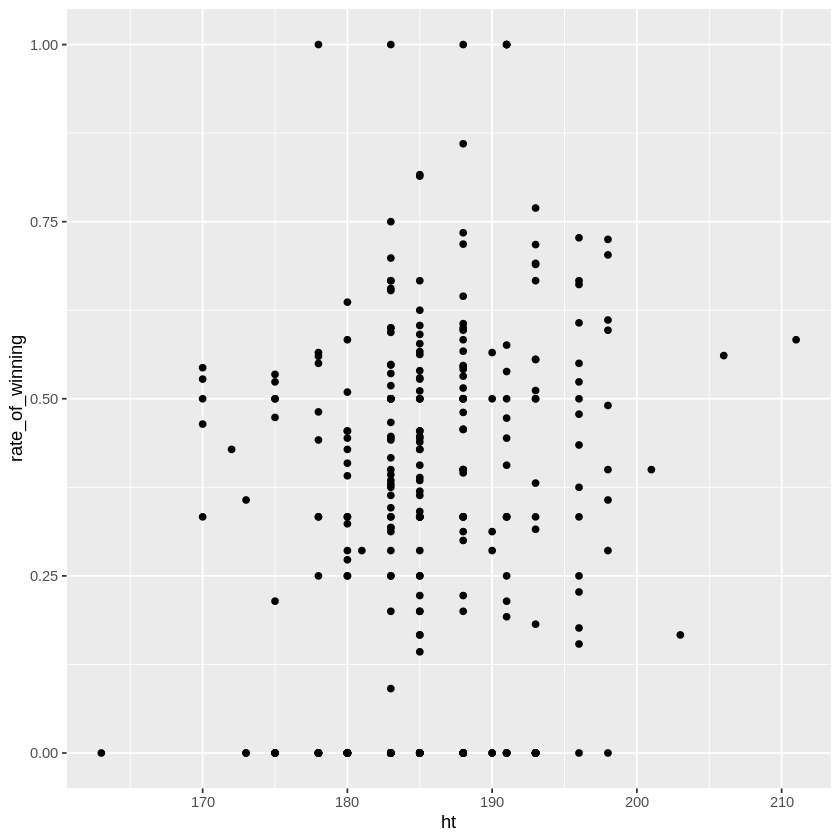

In [3]:
#New data set with all the players, their heights, average age and rate of winning
player_stats_winners<-tennis_data|> select(winner_age, winner_ht, winner_name)|>
    rename(
    age = winner_age,
    ht = winner_ht,
    name = winner_name)|>
    mutate(results = "win")


player_stats_losers<- tennis_data |> 
    select(loser_age, loser_ht, loser_name)|>
    rename(
    age = loser_age,
    ht = loser_ht,
    name = loser_name)|>
    mutate(results = "lose")


player_stats <- rbind(player_stats_winners, player_stats_losers)|>
    filter(age!="NA", ht!="NA")|>
    mutate(results = as_factor(results))|>
    mutate(results = as.numeric(results))|>
    mutate(results = results-1)|>
    group_by(name, ht)|>
    summarize(rate_of_loosing=mean(results), mean_age=mean(age))|>
    mutate(rate_of_winning = 1 - rate_of_loosing)|>
    select(name, mean_age, ht, rate_of_winning)
#|> arrange(rate_of_winning)
player_stats

graph_age <- ggplot(player_stats, aes(x=mean_age, y=rate_of_winning)) +
    geom_point()

graph_ht <- ggplot(player_stats, aes(x=ht, y=rate_of_winning)) +
    geom_point()
graph_age
graph_ht

Splitting our data into testing / training data: 

In [4]:
set.seed(1234)
player_stats_split <- initial_split(player_stats, prop = 0.7, strata = rate_of_winning)
player_stats_training <- training(player_stats_split)
player_stats_testing <- testing(player_stats_split)
player_stats_training
player_stats_testing

name,mean_age,ht,rate_of_winning
<chr>,<dbl>,<dbl>,<dbl>
Alejandro Gonzalez,33.0,190,0
Aleksandre Metreveli,28.3,183,0
Alessandro Giannessi,31.9,183,0
⋮,⋮,⋮,⋮
Vasek Pospisil,31.98889,193,0.5555556
Yibing Wu,22.80000,183,0.6666667
Yuki Bhambri,29.53333,183,0.6666667


name,mean_age,ht,rate_of_winning
<chr>,<dbl>,<dbl>,<dbl>
Ajeet Rai,23.60000,188,0.0000000
Albert Ramos,34.31923,188,0.4807692
Alexey Vatutin,29.90000,178,0.0000000
⋮,⋮,⋮,⋮
Zachary Svajda,19.80000,175,0.0000000
Zdenek Kolar,25.63333,185,0.3333333
Zhizhen Zhang,25.92222,193,0.5555556


We are testing stuff lol, finding lowest RMSE value on the **training data** to determine whether to use KNN_Regression and Linear Regression

Write stuff down here, like steps, here we are just doing KNN_Regression test first (finding lowest RMSE and also optimizing RMSE)... fill in methodology to explain what I'm doing...

In [6]:
set.seed(1234)
player_stats_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

player_stats_recipe <- recipe(rate_of_winning ~ ht + mean_age, data = player_stats_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

player_stats_vfold <- vfold_cv(player_stats_training, v = 5, strata = rate_of_winning)

gridvals <- tibble(neighbors = seq(1, 150))

player_stats_results <- workflow() |> 
    add_recipe(player_stats_recipe) |> 
    add_model(player_stats_spec) |>
    tune_grid(resamples = player_stats_vfold, grid = gridvals) |> # if you use grid = 200, it will test for neighbours from 1:200 (same as gridvals in this case)
    collect_metrics()

player_stats_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,0.38200504,5,0.021289696,Preprocessor1_Model001
1,rsq,standard,0.02924586,5,0.009062251,Preprocessor1_Model001
2,rmse,standard,0.31810539,5,0.023019547,Preprocessor1_Model002
⋮,⋮,⋮,⋮,⋮,⋮,⋮
149,rsq,standard,0.03350761,5,0.01755556,Preprocessor1_Model149
150,rmse,standard,0.25685332,5,0.01000599,Preprocessor1_Model150
150,rsq,standard,0.03198553,5,0.01565038,Preprocessor1_Model150


Find minimum RMSE value and also the most optimum K neighbor to use if we decided to use KNN regression:

In [12]:
player_stats_min <- player_stats_results |>
   filter(.metric == "rmse") |>
   arrange(mean) |> 
   head(1)

player_stats_min


k_min <- player_stats_min |>
         pull(neighbors)

k_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
110,rmse,standard,0.2560578,5,0.00968938,Preprocessor1_Model110


[1] 110

Now let's run the test for Linear Regression:

In [13]:
set.seed(1234)

# your code here
lm_spec <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

player_stats_recipe <- recipe(rate_of_winning ~ mean_age + ht, data = player_stats_training)

player_stats_fit <- workflow() |>
  add_recipe(player_stats_recipe) |>
  add_model(lm_spec) |>
  fit(data = player_stats_training)

Now find the lowest RMSE (training data) for linear regression:

In [11]:
lm_rmse <- player_stats_fit |>
        predict(player_stats_training) |>
        bind_cols(player_stats_training) |>
        metrics(truth = rate_of_winning, estimate = .pred) |>
        filter(.metric == "rmse") |>
        select(.estimate) |>
        pull()

# your code here
lm_rmse

[1] 0.2547258

Therefore, Linear Regression having a lowest lmse means we should use Linear Regression for our model. 

Now let's complete linear regression by predicting the values of the testing data set and finding the accuracy:

In [16]:
player_stats_test_results <- player_stats_fit |>
  predict(player_stats_testing) |>
  bind_cols(player_stats_testing) |>
  metrics(truth = rate_of_winning, estimate = .pred)

player_stats_test_results

#for just the rmpse value, but it's already shown in the tibble
lm_rmspe <- player_stats_test_results |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()

lm_rmspe

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.23791571
rsq,standard,0.02139123
mae,standard,0.19486292


[1] 0.2379157

Now let's visualize the graph:

`geom_smooth()` using formula = 'y ~ x'


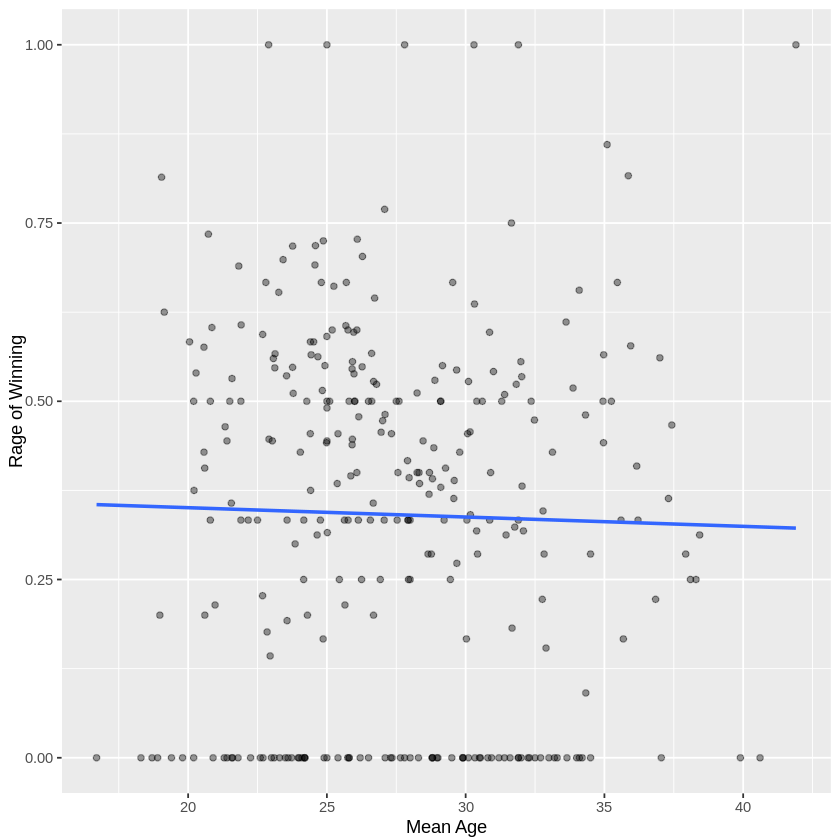

In [22]:
player_stats_final1 <- ggplot(player_stats, aes(x = mean_age, y = rate_of_winning)) +
  geom_point(alpha = 0.4) +
  xlab("Mean Age") +
  ylab("Rage of Winning") +
  geom_smooth(method = "lm", se = FALSE)
player_stats_final1

The other graph:

`geom_smooth()` using formula = 'y ~ x'


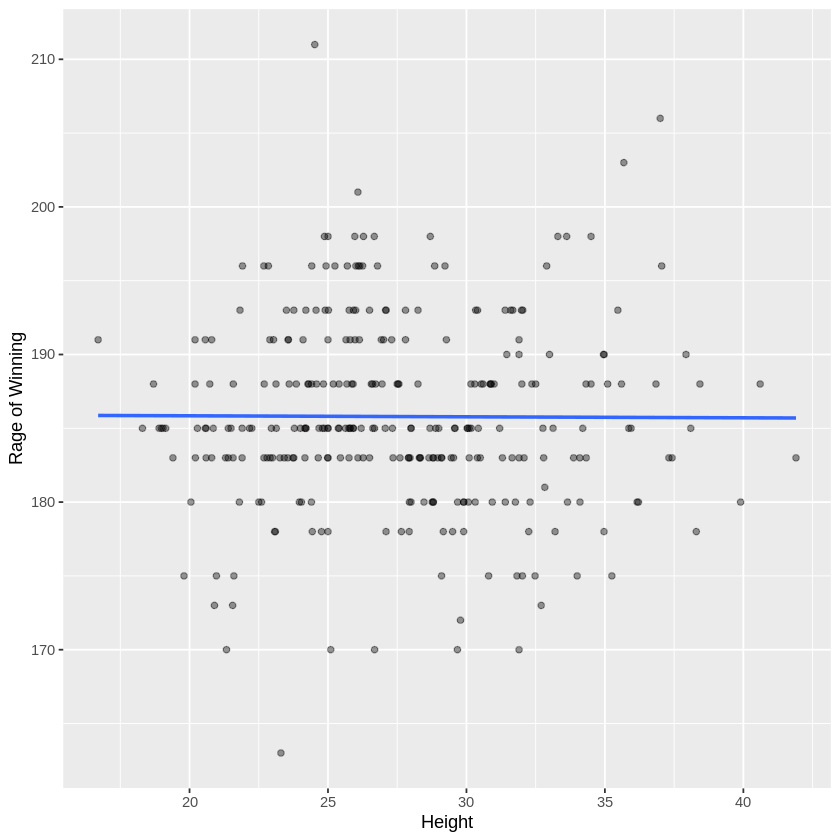

In [23]:
player_stats_final2 <- ggplot(player_stats, aes(x = mean_age, y = ht)) +
  geom_point(alpha = 0.4) +
  xlab("Height") +
  ylab("Rage of Winning") +
  geom_smooth(method = "lm", se = FALSE)
player_stats_final2

### Methods:

We will build our K- classification model and choose the value for K-neighbours using our training data by making a temporary workflow that includes a recipe with the winner as our classifier, age, height, and seed as predictors (data is scaled). We will be using the columns “winner_seed”, “winner_age”, “winner_name”, “winner_ht”, “loser_seed”, “loser_age”, “loser_name”, and “loser_ht” from the raw data set to make our prediction. 

To visualize our data, we use the predictions from the testing data to create a confusion matrix. 

### Expected outcomes and significance:

From our analysis, we expect to classify whether we would expect Felix to win or lose a match given a new observation on the age, height, and seed of any other player. The findings from this algorithm could have an impact on the training method of the analyzed player (i.e. Felix) for optimization of that particular player’s performance against certain metrics. For example, if the target player was classified to win/lose against a young player with a shorter height, the target athlete may devise strategic training against this information. Generally, this analysis could be applied to other predictors (factors) that are significant for a tennis player to recognize patterns that increase the rate of winning matches. 

Thus, this could lead to further questions such as *is there an improvement in the athlete’s performance before and after initiating changes?*
